In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices(device_type="GPU")[0], True)
tf.config.run_functions_eagerly(True)

from msfm.utils import files
from msfm.grid_pipeline import GridPipeline
from msfm.fiducial_pipeline import FiducialPipeline

from msfm.utils import input_output, files, scales

from deepsphere.healpy_layers import HealpySmoothing

In [2]:
# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

# 246pt in inches (for the Phys Rev template)
half_linewidth = 3.41
# 510pt in inches (figure* environment in the Phys Rev template)
full_linewidth = 7.06

In [3]:
lensing_theta = [22.1, 15.1, 11.2, 9.4]
clustering_theta = [65.1, 44.5, 34.1, 28.5]
l_min = 30

# alm

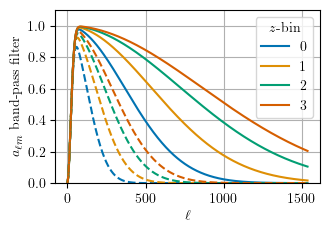

In [4]:
ell = np.arange(3*512 - 1)

fig, ax = plt.subplots(figsize=(half_linewidth, 0.66*half_linewidth))

colors = sns.color_palette("colorblind", len(lensing_theta))

for i, theta in enumerate(lensing_theta):
    low_pass_fac = scales.gaussian_low_pass_factor_alm(ell, theta_fwhm=theta)
    high_pass_fac = scales.gaussian_high_pass_factor_alm(ell, l_min=l_min)
    filter_fac = low_pass_fac * high_pass_fac

    ax.plot(ell, filter_fac, linestyle="-", color=colors[i], label=i)

for i, theta in enumerate(clustering_theta):
    low_pass_fac = scales.gaussian_low_pass_factor_alm(ell, theta_fwhm=theta)
    high_pass_fac = scales.gaussian_high_pass_factor_alm(ell, l_min=l_min)
    filter_fac = low_pass_fac * high_pass_fac

    ax.plot(ell, filter_fac, linestyle="--", color=colors[i])

ax.set(xscale='linear', yscale='linear', xlabel=r"$\ell$", ylabel=r'$a_{\ell m}$ band-pass filter', ylim=(0, 1.1))
ax.grid(True)
ax.legend(loc="upper right", title=r"$z$-bin")

ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

# fig.tight_layout()
# ax.set_position([0.15, 0.15, 0.75, 0.75])
# fig.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)

# fig.savefig("plots/alm_filter_tight.png", bbox_inches="tight")
fig.savefig("plots/alm_filter.pdf", bbox_inches="tight")

In [5]:
high_pass_fac = scales.gaussian_high_pass_factor_alm(ell, l_min=30)**2
high_pass_fac[10]

np.float32(0.010621832)

In [6]:
# ell = np.arange(3*512 - 1)

# fig, ax = plt.subplots(figsize=(half_linewidth, 0.66*half_linewidth))

# colors = sns.color_palette("rocket", len(lensing_theta))
# for i, theta in enumerate(lensing_theta):
#     low_pass_fac = scales.gaussian_low_pass_factor_alm(ell, theta_fwhm=theta)
#     high_pass_fac = scales.gaussian_high_pass_factor_alm(ell, l_min=30)
#     filter_fac = low_pass_fac * high_pass_fac

#     ax.plot(ell, filter_fac, linestyle="-", color=colors[i], label=i)

# colors = sns.color_palette("mako", len(clustering_theta))
# for i, theta in enumerate(clustering_theta):
#     low_pass_fac = scales.gaussian_low_pass_factor_alm(ell, theta_fwhm=theta)
#     high_pass_fac = scales.gaussian_high_pass_factor_alm(ell, l_min=30)
#     filter_fac = low_pass_fac * high_pass_fac

#     ax.plot(ell, filter_fac, linestyle="-", color=colors[i], label=i)

# ax.set(xscale='linear', yscale='linear', ylabel=r'$a_{\ell m}$ filter', ylim=(0, 1.1))
# ax.grid(True)

# # fig.tight_layout()
# # fig.savefig("plots/alm_filter.pdf", bbox_inches="tight")

In [7]:
# ell = np.arange(3*512 - 1)

# fig, ax = plt.subplots(figsize=(half_linewidth, 2*0.66*half_linewidth), nrows=2, sharex=True)
# colors = sns.color_palette("colorblind")

# for i, theta in enumerate(lensing_theta):
#     low_pass_fac = scales.gaussian_low_pass_factor_alm(ell, theta_fwhm=theta)
#     high_pass_fac = scales.gaussian_high_pass_factor_alm(ell, l_min=30)
#     filter_fac = low_pass_fac * high_pass_fac

#     ax[0].plot(ell, filter_fac, linestyle="-", color=colors[i], label=i)

# # ax[0].set(xscale='linear', yscale='log', ylabel=r'weak lensing $a_{\ell m}$ filter', ylim=(1e-3, 2))
# ax[0].set(xscale='linear', yscale='linear', ylabel=r'$a_{\ell m}$ filter', ylim=(0, 1.1), title="weak lensing")
# ax[0].grid(True)
# # ax[0].legend(loc="lower left", title=r"$z$-bin")

# for i, theta in enumerate(clustering_theta):
#     low_pass_fac = scales.gaussian_low_pass_factor_alm(ell, theta_fwhm=theta)
#     high_pass_fac = scales.gaussian_high_pass_factor_alm(ell, l_min=30)
#     filter_fac = low_pass_fac * high_pass_fac
#     # filter_fac = filter_fac / filter_fac.max()

#     ax[1].plot(ell, filter_fac, linestyle="-", color=colors[i], label=i)

# # ax[1].set(xscale='linear', yscale='log', xlabel=r'$\ell$', ylabel=r'galaxy clustering $a_{\ell m}$ filter', ylim=[1e-3, 2])
# ax[1].set(xscale='linear', yscale='linear', xlabel=r'$\ell$', ylabel=r'$a_{\ell m}$ filter', ylim=[0, 1.1], title="galaxy clustering")
# ax[1].grid(True)
# ax[1].legend(loc="upper right", title=r"$z$-bin")

# # fig.tight_layout()
# # fig.savefig("plots/alm_filter.pdf", bbox_inches="tight")

### data

In [8]:
# conf = "/Users/arne/git/multiprobe-simulation-forward-model/configs/v8/linear_bias_no_smoothing.yaml"
# conf = "/Users/arne/git/multiprobe-simulation-forward-model/configs/v9/linear_bias.yaml"
conf = "/Users/arne/git/multiprobe-simulation-forward-model/configs/v10/linear_bias.yaml"
conf = files.load_config(conf)
params = ["Om", "s8", "Ob", "H0", "ns", "w0", "Aia", "n_Aia", "bg", "n_bg"]
# tfr_pattern = "/Users/arne/data/DESY3/paper_1/DESy3_grid_dmb_0000.tfrecord"
tfr_pattern = "/Users/arne/data/DESY3/paper_1/v14/DESy3_grid_dmb_0000.tfrecord"

grid_pipe = GridPipeline(
    conf=conf,
    params=params,
    with_lensing=True,
    with_clustering=True,
    with_padding=True,
    apply_norm=False,
)

data_vec_pix = grid_pipe.data_vec_pix
n_side = conf["analysis"]["n_side"]
n_pix = hp.nside2npix(n_side)
n_z = grid_pipe.n_z_metacal + grid_pipe.n_z_maglim
n_z_metacal = grid_pipe.n_z_metacal
n_noise = 3

25-06-04 10:54:48     files.py INF   Loaded the pixel file /Users/arne/git/multiprobe-simulation-forward-model/data/DESY3_pixels_v11_fiducial_512.h5 
25-06-04 10:54:49     files.py INF   Loaded the pixel file /Users/arne/git/multiprobe-simulation-forward-model/data/DESY3_pixels_v11_fiducial_512.h5 


2025-06-04 10:54:49.191191: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2025-06-04 10:54:49.191235: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2025-06-04 10:54:49.191244: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
I0000 00:00:1749027289.191264 12181363 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1749027289.191305 12181363 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### map: smoothing

In [9]:
# dlss_conf = "/global/u2/a/athomsen/y3-deep-lss/configs/v8/combined/linear_bias/dlss_config.yaml"
# dlss_conf = input_output.read_yaml(dlss_conf)

dlss_conf = {
    "scale_cuts" : {
          "n_sigma_support": 5,
          "arcmin": True,
          "lensing": {
            # 6 Mpc/h transverse comoving scale -> arcmin
            "theta_fwhm": lensing_theta
          },
        "clustering" : {
            # 16 Mpc/h transverse comoving scale -> arcmin
            "theta_fwhm": clustering_theta
        },
    }
}

            
mask_dict = files.get_tomo_dv_masks(conf)
mask = tf.concat([mask_dict["metacal"], mask_dict["maglim"]], axis=1)
# mask = mask.numpy()

fwhm = dlss_conf["scale_cuts"]["lensing"]["theta_fwhm"] + dlss_conf["scale_cuts"]["clustering"]["theta_fwhm"]
    
smoothing_kwargs = {
    "nside": n_side,
    "indices": data_vec_pix,
    "nest": True,
    "mask": mask,
    "fwhm": fwhm,
    "arcmin": dlss_conf["scale_cuts"]["arcmin"],
    "n_sigma_support": dlss_conf["scale_cuts"]["n_sigma_support"],
    # 1% without normalization
    # "white_noise_sigma": [0.02696545, 0.02255348, 0.02399884, 0.0438009, 0.52009278, 0.20640544, 0.1494878, 0.13530551],
    "white_noise_sigma": [2.3190e-04, 3.0898e-04, 4.1758e-04, 1.0030e-03] + [5.2009e-01, 2.0641e-01, 1.4949e-01, 1.3531e-01],
    "data_path": ".",
}

noisy_smoothing_layer = tf.function(HealpySmoothing(**smoothing_kwargs))

smoothing_kwargs["white_noise_sigma"] = None
smoothing_layer = tf.function(HealpySmoothing(**smoothing_kwargs))

25-06-04 10:54:49     files.py INF   Loaded the pixel file /Users/arne/git/multiprobe-simulation-forward-model/data/DESY3_pixels_v11_fiducial_512.h5 
Using the per channel smoothing repetitions [ 6  3  2  1 48 23 14 10]
Using the per channel smoothing scales sigma = [ 9.78  6.91  5.65  3.99 27.66 19.14 14.94 12.62] arcmin, fwhm = [23.03 16.28 13.29  9.4  65.13 45.08 35.17 29.73] arcmin
Successfully loaded sparse kernel indices and values from .


2025-06-04 10:54:50.692202: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: INTERNAL: Obtained a write index of 458752 which is outside of bounds of [0, 458752)


InternalError: {{function_node __wrapped__SparseReduceSum_device_/job:localhost/replica:0/task:0/device:CPU:0}} Obtained a write index of 458752 which is outside of bounds of [0, 458752) [Op:SparseReduceSum] name: 

In [ ]:
grid_dset = grid_pipe.get_dset(
        tfr_pattern=tfr_pattern,
        noise_indices=n_noise,
        local_batch_size=1,
        n_readers=1,
        n_prefetch=0,
)

for dv, _, cosmo, index in grid_dset.skip(11).take(1):
    dv_raw = dv[0]
    dv_smooth = smoothing_layer(dv)[0]
    dv_noisy = noisy_smoothing_layer(dv)[0]

print(dv.shape)
print(dv_raw.shape)

24-10-16 16:17:15 grid_pipelin INF   n_workers is not set, using tf.data.AUTOTUNE. This might produce unexpected RAM usage. 
24-10-16 16:17:15 grid_pipelin INF   drop_remainder is not set, using drop_remainder = False 
24-10-16 16:17:15 grid_pipelin INF   Including noise_indices = [0, 1, 2] 
24-10-16 16:17:15 grid_pipelin INF   Interleaving with n_readers = 1 


/opt/homebrew/Caskroom/miniforge/base/envs/dlss/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


dict_keys(['cosmo', 'i_sobol', 'i_example', 'kg', 'dg', 'cl'])
24-10-16 16:17:16 grid_pipelin INF   Batching into 1 elements locally 
24-10-16 16:17:16 grid_pipelin WAR   Tracing _augmentations 
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
24-10-16 16:17:17 grid_pipelin INF   Running on the data_vector

2024-10-16 16:17:29.236976: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
# in degrees
x_deg = 10
y_deg = x_deg

# in pixels
x_pix = 600
y_pix = x_pix

# in arcminute / pixel
reso = x_deg / x_pix * 60

# for the rotated DES footprint
rot = (90, -30, 0)
# rot = (97, -32, 0)

gnoms_raw = np.zeros((x_pix, y_pix, n_z))
gnoms_smooth = np.zeros((x_pix, y_pix, n_z))
gnoms_noisy = np.zeros((x_pix, y_pix, n_z))

for i_z in range(n_z):
    # raw
    hp_map = np.full(n_pix, hp.UNSEEN)
    hp_map[data_vec_pix] = dv_raw[:, i_z]

    gnom_raw = hp.gnomview(
        hp_map, nest=True, rot=rot, reso=reso, xsize=x_pix, ysize=y_pix, return_projected_map=True, no_plot=True
    )
    gnoms_raw[..., i_z] = gnom_raw

    # smooth
    hp_map = np.full(n_pix, hp.UNSEEN)
    hp_map[data_vec_pix] = dv_smooth[:, i_z]

    gnom_smooth = hp.gnomview(
        hp_map, nest=True, rot=rot, reso=reso, xsize=x_pix, ysize=y_pix, return_projected_map=True, no_plot=True
    )
    gnoms_smooth[..., i_z] = gnom_smooth

    # noisy
    hp_map = np.full(n_pix, hp.UNSEEN)
    hp_map[data_vec_pix] = dv_noisy[:, i_z]

    gnom_noisy = hp.gnomview(
        hp_map, nest=True, rot=rot, reso=reso, xsize=x_pix, ysize=y_pix, return_projected_map=True, no_plot=True
    )
    gnoms_noisy[..., i_z] = gnom_noisy


gnoms_raw = np.ma.masked_where(gnoms_raw == 0, gnoms_raw)
gnoms_smooth = np.ma.masked_where(gnoms_smooth == 0, gnoms_smooth)
gnoms_noisy = np.ma.masked_where(gnoms_noisy == 0, gnoms_noisy)

# map: raw vs. smoothed

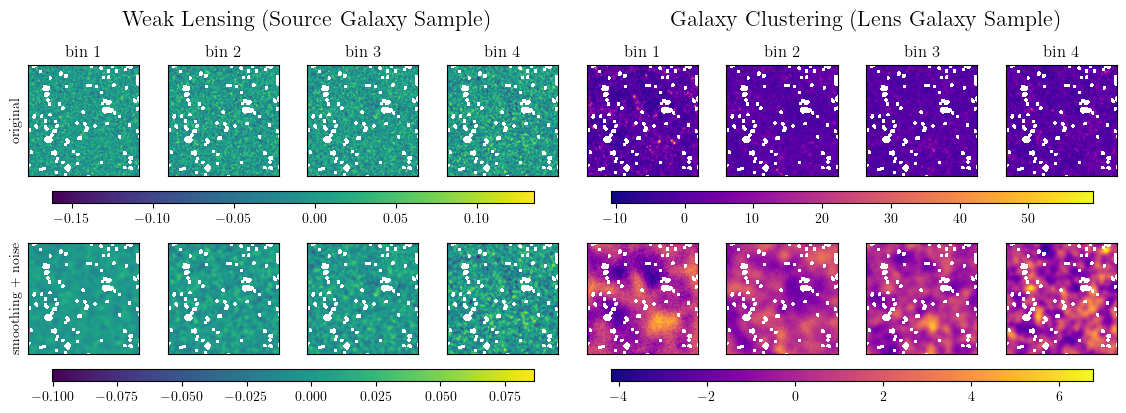

In [ ]:
# fig, ax = plt.subplots(figsize=(16, 4), nrows=2, ncols=n_z)
fig, ax = plt.subplots(figsize=(2*full_linewidth, 0.6*full_linewidth), nrows=2, ncols=n_z)

wl_min_noisy = np.array(gnoms_noisy[..., :n_z_metacal]).min()
wl_max_noisy = np.array(gnoms_noisy[..., :n_z_metacal]).max()
wl_min_raw = np.array(gnoms_raw[..., :n_z_metacal]).min()
wl_max_raw = np.array(gnoms_raw[..., :n_z_metacal]).max()

gc_min_noisy = np.array(gnoms_noisy[..., n_z_metacal:]).min()
gc_max_noisy = np.array(gnoms_noisy[..., n_z_metacal:]).max()
gc_min_raw = np.array(gnoms_raw[..., n_z_metacal:]).min()
gc_max_raw = np.array(gnoms_raw[..., n_z_metacal:]).max()

i_n = 0
for i_z in range(n_z):
    # lensing
    if i_z < n_z_metacal:
        vmin_noisy = wl_min_noisy
        vmax_noisy = wl_max_noisy
        vmin_raw = wl_min_raw
        vmax_raw = wl_max_raw

        cmap = "viridis"
        # cmap = sns.color_palette("mako", as_cmap=True)

    # clustering
    else:
        vmin_noisy = gc_min_noisy
        vmax_noisy = gc_max_noisy
        vmin_raw = gc_min_raw
        vmax_raw = gc_max_raw

        cmap = "plasma"
        # cmap = sns.color_palette("rocket", as_cmap=True)

    # plotting
    im_raw = ax[0, i_z].imshow(gnoms_raw[..., i_z], vmin=vmin_raw, vmax=vmax_raw, cmap=cmap)
    im_noisy = ax[1, i_z].imshow(gnoms_noisy[..., i_z], vmin=vmin_noisy, vmax=vmax_noisy, cmap=cmap)

    if i_z == 0:
        fig.colorbar(im_raw, ax=ax[0, :n_z_metacal], orientation="horizontal", shrink=0.9, aspect=40, pad=0.1)
        fig.colorbar(im_noisy, ax=ax[1, :n_z_metacal], orientation="horizontal", shrink=0.9, aspect=40, pad=0.1)

    if i_z == 4:
        fig.colorbar(im_raw, ax=ax[0, n_z_metacal:], orientation="horizontal", shrink=0.9, aspect=40, pad=0.1)
        fig.colorbar(im_noisy, ax=ax[1, n_z_metacal:], orientation="horizontal", shrink=0.9, aspect=40, pad=0.1)

    for i in range(2):
        ax[i, i_z].set_xticks([])
        ax[i, i_z].set_yticks([])
        ax[i, i_z].set_aspect("equal")


for i, bin_number in enumerate(range(1, 5)):
    ax[0, i].set(title=f"bin {bin_number}")

for i, bin_number in enumerate(range(1, 5)):
    ax[0, i + 4].set(title=f"bin {bin_number}")

# title_ax = fig.add_subplot(121, frame_on=False)
# title_ax.xaxis.set_visible(False)
# title_ax.yaxis.set_visible(False)
# title_ax.set_title(r"Weak Lensing/Source \textsc{Metacalibration} Sample", fontsize=14, loc="center", y=1.1)

# title_ax = fig.add_subplot(122, frame_on=False)
# title_ax.xaxis.set_visible(False)
# title_ax.yaxis.set_visible(False)
# title_ax.set_title(r"Galaxy Clustering/Lens \textsc{Maglim} Sample", fontsize=14, loc="center", y=1.1)

# fig.text(0, 1.5, r"Weak Lensing \\ \textsc{Metacalibration} Source Sample", ha="center", va="center", fontsize=16, transform=ax[0, 2].transAxes)
# fig.text(0, 1.5, r"Galaxy Clustering: \textsc{Maglim} Lens Sample", ha="center", va="center", fontsize=16, transform=ax[0, 6].transAxes)

# fig.text(0, 1.6, r"Weak Lensing", ha="center", va="center", fontsize=16, transform=ax[0, 2].transAxes)
# fig.text(0, 1.4, r"\textsc{Metacalibration} Source Sample", ha="center", va="center", fontsize=16, transform=ax[0, 2].transAxes)
# fig.text(0, 1.6, r"Galaxy Clustering", ha="center", va="center", fontsize=16, transform=ax[0, 6].transAxes)
# fig.text(0, 1.4, r"\textsc{Maglim} Lens Sample", ha="center", va="center", fontsize=16, transform=ax[0, 6].transAxes)

fig.text(0, 1.4, r"Weak Lensing (Source Galaxy Sample)", ha="center", va="center", fontsize=16, transform=ax[0, 2].transAxes)
fig.text(0, 1.4, r"Galaxy Clustering (Lens Galaxy Sample)", ha="center", va="center", fontsize=16, transform=ax[0, 6].transAxes)

for i, label in enumerate(["original", "smoothing + noise"]):
    ax[i, 0].set(ylabel=label)

# fig.tight_layout()
fig.savefig("plots/smoothing_map.pdf", bbox_inches="tight")

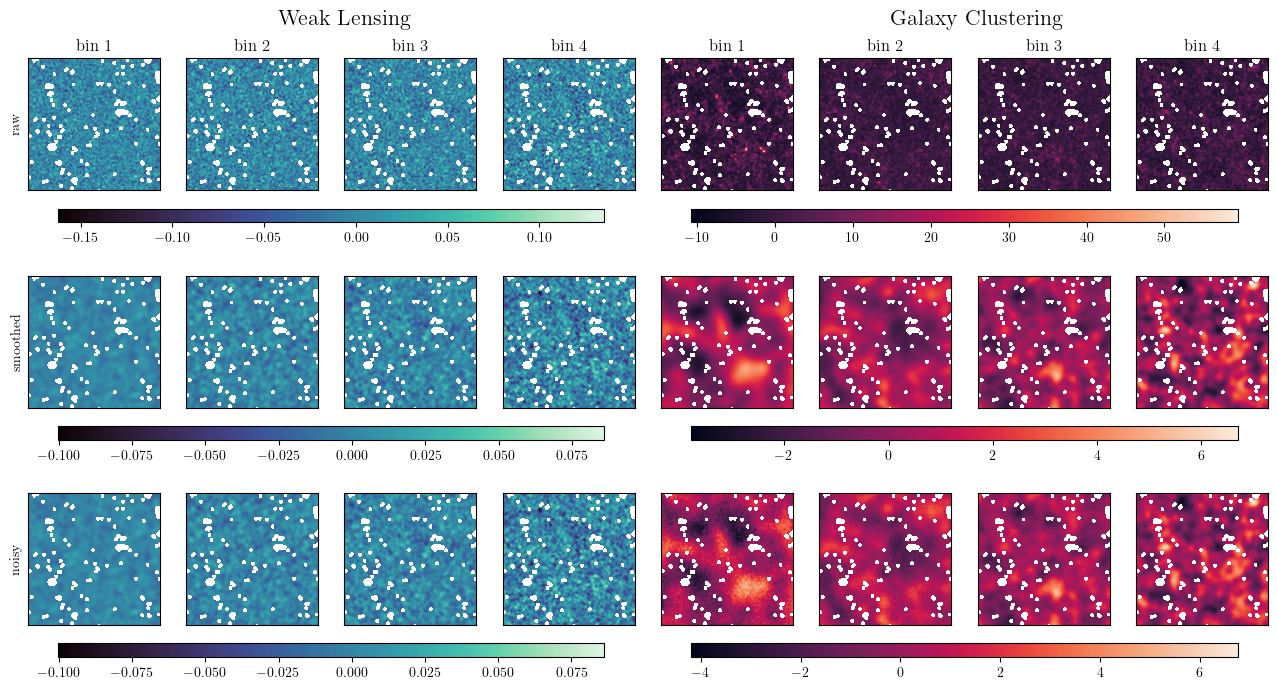

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8), nrows=3, ncols=n_z)

wl_min_raw = np.array(gnoms_raw[..., :n_z_metacal]).min()
wl_max_raw = np.array(gnoms_raw[..., :n_z_metacal]).max()
wl_min_smooth = np.array(gnoms_smooth[..., :n_z_metacal]).min()
wl_max_smooth = np.array(gnoms_smooth[..., :n_z_metacal]).max()
wl_min_noisy = np.array(gnoms_noisy[..., :n_z_metacal]).min()
wl_max_noisy = np.array(gnoms_noisy[..., :n_z_metacal]).max()

gc_min_raw = np.array(gnoms_raw[..., n_z_metacal:]).min()
gc_max_raw = np.array(gnoms_raw[..., n_z_metacal:]).max()
gc_min_smooth = np.array(gnoms_smooth[..., n_z_metacal:]).min()
gc_max_smooth = np.array(gnoms_smooth[..., n_z_metacal:]).max()
gc_min_noisy = np.array(gnoms_noisy[..., n_z_metacal:]).min()
gc_max_noisy = np.array(gnoms_noisy[..., n_z_metacal:]).max()

i_n = 0
for i_z in range(n_z):
    # lensing
    if i_z < n_z_metacal:
        vmin_raw = wl_min_raw
        vmax_raw = wl_max_raw
        vmin_smooth = wl_min_smooth
        vmax_smooth = wl_max_smooth
        vmin_noisy = wl_min_noisy
        vmax_noisy = wl_max_noisy

        # cmap = "viridis"
        cmap = sns.color_palette("mako", as_cmap=True)

    # clustering
    else:
        vmin_raw = gc_min_raw
        vmax_raw = gc_max_raw
        vmin_smooth = gc_min_smooth
        vmax_smooth = gc_max_smooth
        vmin_noisy = gc_min_noisy
        vmax_noisy = gc_max_noisy

        # cmap = "plasma"
        cmap = sns.color_palette("rocket", as_cmap=True)

    # plotting
    im_raw = ax[0, i_z].imshow(gnoms_raw[..., i_z], vmin=vmin_raw, vmax=vmax_raw, cmap=cmap)
    im_smooth = ax[1, i_z].imshow(gnoms_smooth[..., i_z], vmin=vmin_smooth, vmax=vmax_smooth, cmap=cmap)
    im_noisy = ax[2, i_z].imshow(gnoms_noisy[..., i_z], vmin=vmin_noisy, vmax=vmax_noisy, cmap=cmap)

    if i_z == 0:
        fig.colorbar(im_raw, ax=ax[0, :n_z_metacal], orientation="horizontal", shrink=0.9, aspect=40, pad=0.1)
        fig.colorbar(im_smooth, ax=ax[1, :n_z_metacal], orientation="horizontal", shrink=0.9, aspect=40, pad=0.1)
        fig.colorbar(im_noisy, ax=ax[2, :n_z_metacal], orientation="horizontal", shrink=0.9, aspect=40, pad=0.1)

    if i_z == 4:
        fig.colorbar(im_raw, ax=ax[0, n_z_metacal:], orientation="horizontal", shrink=0.9, aspect=40, pad=0.1)
        fig.colorbar(im_smooth, ax=ax[1, n_z_metacal:], orientation="horizontal", shrink=0.9, aspect=40, pad=0.1)
        fig.colorbar(im_noisy, ax=ax[2, n_z_metacal:], orientation="horizontal", shrink=0.9, aspect=40, pad=0.1)

    for i in range(3):
        ax[i, i_z].set_xticks([])
        ax[i, i_z].set_yticks([])
        ax[i, i_z].set_aspect("equal")

fig.text(0, 1.3, r"Weak Lensing", ha="center", va="center", fontsize=16, transform=ax[0, 2].transAxes)
fig.text(0, 1.3, r"Galaxy Clustering", ha="center", va="center", fontsize=16, transform=ax[0, 6].transAxes)

for i, bin_number in enumerate(range(1, 5)):
    ax[0, i].set(title=f"bin {bin_number}")

for i, bin_number in enumerate(range(1, 5)):
    ax[0, i + 4].set(title=f"bin {bin_number}")

for i, label in enumerate(["raw", "smoothed", "noisy"]):
    ax[i, 0].set(ylabel=label)

fig.savefig("plots/raw,smoothed,noisy_map.png", bbox_inches="tight", dpi=100)

# comparison

i_z = 4